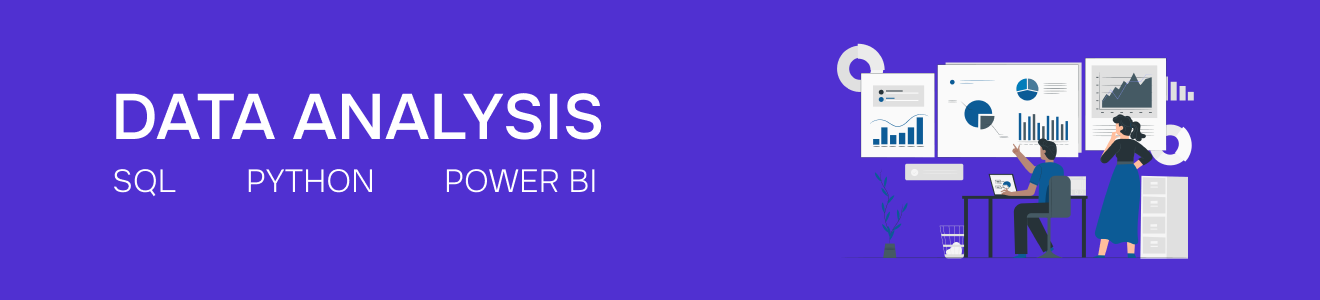

# <center> 1. Data Preparation

This script has only one purpose - cleaning and transforming files with sales data to panel data format.  
Final csv files are going to be loaded to postgres sql.

In [81]:
import pandas as pd
import csv

In [82]:
df = pd.read_excel('C:/Users/АЛЕКСАНДРА/Downloads/Sales 2018.xlsx', header = None)

Deleting completely empty columns and rows.

In [83]:
df.dropna(axis='columns',how='all', inplace=True)

In [84]:
df.dropna(axis='rows',how='all', inplace=True)

In [85]:
df.tail()

,0,11,15,18,21,24,26,28,31,33,...,51,53,55,57,58,59,60,61,62,63
1342,Зажим для троса U образный стальной под канат ...,4,165,NaN,NaN,4,165,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1343,"Вкладыш башмака кабины ОТИС 200*25*5,8мм, шт",2,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1344,"Коуш 7,8 мм., шт",3,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,90
1345,Итого,129150.35,47242069,5635,1812875,6527.5,2943085,17147,3057285,8219.3,...,13601.3,4623467,7031,3960795,11496.6,4285552,12547.45,4520897,18538.5,6418153
1346,\n* В диаграммах выводится 5 самых продаваемых...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Deleting unnecessary columns and rows  with quantity, we will need only sales data.

In [86]:
df_sum=df.drop(labels=[11, 15, 18, 24, 28, 33, 37, 42, 46, 51, 55, 58, 60, 62], axis='columns')

In [87]:
df_sum.drop(labels=[0,1,3,54,55], axis='rows', inplace=True)

Renaming of columns - technical numbers to dates of first day of each month.

In [88]:
df_sum.rename({0: 'product', 21:'2018-01-01', 26:'2018-02-01',31:'2018-03-01', 35:'2018-04-01', 40:'2018-05-01', 44:'2018-06-01',
              49:'2018-07-01', 53:'2018-08-01', 57:'2018-09-01', 59:'2018-10-01', 61:'2018-11-01', 63:'2018-12-01'},
              axis=1, inplace = True)

In [89]:
df_sum.head()

,product,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
56,"Канат лифтовой нарезной 10,0 мм DIN 3062, м",229717,47987,472811,353471,236420,255474,240696,594691,187371,412431,617619,871826
57,"Шкив КВШ 575х5х10, шт",23000,75810,46000,28050,23000,99980,NaN,46000,161730,46000,120620,307960
58,"Канат лифтовой нарезной 8.0мм DIN 3062, м",19609,74999,149231,NaN,114062,32238,90585,100554,114190,74375,80715,46009
59,"Канат лифтовой нарезной 12.0мм DIN 3062, м",43595,112456,NaN,46067,52875,78256,27239,98714,46025,142491,34753,133142
60,Шкив для безредукторной лебедки WSG-S2.1 320х8...,NaN,NaN,NaN,NaN,267000,NaN,200250,66750,NaN,NaN,200250,NaN


Transforming to panel data.

In [90]:
df_sum = df_sum.melt(id_vars='product', value_vars=['2018-01-01','2018-02-01','2018-03-01',
              '2018-04-01', '2018-05-01','2018-06-01','2018-07-01', '2018-08-01','2018-09-01',
              '2018-10-01','2018-11-01', '2018-12-01'])

In [91]:
df_sum.tail()

,product,variable,value
15487,Зажим для троса U образный стальной под канат ...,2018-12-01,NaN
15488,"Вкладыш башмака кабины ОТИС 200*25*5,8мм, шт",2018-12-01,NaN
15489,"Коуш 7,8 мм., шт",2018-12-01,90
15490,Итого,2018-12-01,6418153
15491,\n* В диаграммах выводится 5 самых продаваемых...,2018-12-01,NaN


In [92]:
df_sum.drop(labels=[15490,15491], axis='rows', inplace=True)

All emply cells are filled with zero.

In [93]:
df_sum = df_sum.fillna(0)
df_sum.head()

,product,variable,value
0,"Канат лифтовой нарезной 10,0 мм DIN 3062, м",2018-01-01,229717
1,"Шкив КВШ 575х5х10, шт",2018-01-01,23000
2,"Канат лифтовой нарезной 8.0мм DIN 3062, м",2018-01-01,19609
3,"Канат лифтовой нарезной 12.0мм DIN 3062, м",2018-01-01,43595
4,Шкив для безредукторной лебедки WSG-S2.1 320х8...,2018-01-01,0


In [94]:
df_sum.rename({'variable':'date', 'value':'revenue'}, axis=1, inplace = True)

Checking and changing data types.

In [95]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15490 entries, 0 to 15489
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  15490 non-null  object
 1   date     15490 non-null  object
 2   revenue  15490 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 363.2+ KB


In [96]:
df_sum['date'] = pd.to_datetime(df_sum['date'], dayfirst = False, infer_datetime_format=True)

In [97]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15490 entries, 0 to 15489
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   product  15490 non-null  object        
 1   date     15490 non-null  datetime64[ns]
 2   revenue  15490 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 363.2+ KB


Exporting dataset to csv.

In [98]:
df_sum.to_csv('C:/Users/АЛЕКСАНДРА/Downloads/Sales 2018.csv', encoding='cp1251', index=None, header=True, errors='ignore')